### Simulated Annealing ###

$$
f(x)=x^{3}-60 x^{2}+900 x+100
$$
- A solution $x$ is represented as a string of 5 bits.
- The neighborhood consists in flipping randomly a bit.
- The initial solution is $10011(x=19, f(x)=2399$ )
- Testing two scenarios:
- First scenario: initial temperature $\mathrm{T}_{0}$ equal to 500 .
- Second scenario: initial temperature $\mathrm{T}_{0}$ equal to 100 .
- Cooling: $\mathrm{T}=0.9 . \mathrm{T}$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [281]:
### SIMULATED ANNEALING ALGORITHM V1 ###
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	#best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best = bounds[:, 0] + random.random() * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
    best_eval = objective(best)
	# current working solution
    curr, curr_eval = best, best_eval
	# run the algorithm
    for i in range(n_iterations):
        #print(i)
		# take a step
		#candidate = curr + randn(len(bounds)) * step_size
        candidate = curr + random.random() * step_size
		# evaluate candidate point
        candidate_eval = objective(candidate)
		# check for new best solution
        if candidate_eval[1] < best_eval[1]:
			# store new best point
            best, best_eval = candidate, candidate_eval
			# report progress
            #print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
        #t = temp / float(i + 1)
        temp *= 0.9
		# calculate metropolis acceptance criterion
        metropolis = np.exp(-diff / temp)
		# check if we should keep the new point
        if diff[1] < 0 or random.random() < metropolis[1]:
			# store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval]

In [429]:
### SIMULATED ANNEALING ALGORITHM V2 ###

def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
    # generate an initial point
    best = bounds[:, 0] + random.random() * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + random.random() * step_size
        # check if candidate is within bounds
        for i in range(len(bounds)):
            if candidate[i] < bounds[i, 0]:  # if below lower bound
                candidate[i] = bounds[i, 0]
            elif candidate[i] > bounds[i, 1]:  # if above upper bound
                candidate[i] = bounds[i, 1]
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval[0] > best_eval[0]:  # Change here for maximization
            # store new best point
            best, best_eval = candidate, candidate_eval
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        temp *= 0.9
        # calculate metropolis acceptance criterion
        metropolis = np.exp(-diff / temp)  # Change here for maximization
        # check if we should keep the new point
        if diff[0] > 0 or random.random() < metropolis[0]:  # Change here for maximization
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval]


In [424]:
### RUN ONCE ###

# variables
n_iterations = 100
step_size = 0.01
temp = 500

# element 0 is x bounds, element 1 is y bounds
# x bound is limited to 5 bits
bounds = np.array([[0, 31], [0, 0]])

# function to maximize
func = lambda x: x**3 - 60 * x**2 + 900 * x + 100

result = simulated_annealing(func, bounds, n_iterations, step_size, temp)

print("Best: ", result[0])
print("Best evaluation: ", result[1])

Best:  [5.05160801 0.        ]
Best evaluation:  [3244.23329053  100.        ]


T_0 =  500  average max: ( 10.644300959093252 ,  4087.8137528380776 )
T_0 =  100  average max: ( 10.644300959093252 ,  4087.8137528380776 )


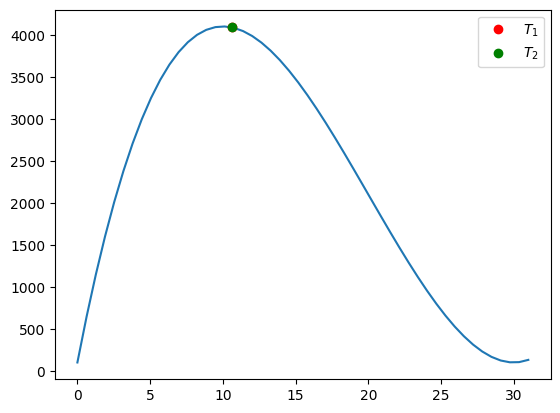

In [430]:
### RUN AND AVERAGE ###

# variables
n_iterations = int(100)
step_size = 5 # max step size
temp1 = 500
temp2 = 100
n_tests = 200

bounds = np.array([[0, 31], [0, 0]])
func = lambda x: x**3 - 60 * x**2 + 900 * x + 100

sum1 = 0
for i in range(n_tests):
    result = simulated_annealing(func, bounds, n_iterations, step_size, temp1)[0]
    sum1 += result[0]

avg1 = sum1 / n_tests

sum2 = 0
for i in range(n_tests):
    result = simulated_annealing(func, bounds, n_iterations, step_size, temp2)[0]
    sum2 += result[0]

avg2 = sum2 / n_tests

print("T_0 = ", temp1, " average max: (", avg1, ", ", func(avg1), ")")
print("T_0 = ", temp2, " average max: (", avg2, ", ", func(avg2), ")")

x = np.mgrid[0:31:50j]
plt.plot(x, func(x))
plt.plot(avg1, func(avg1), 'ro', label="$T_1$")
plt.plot(avg2, func(avg2), 'go', label="$T_2$")
plt.legend()
plt.show()